## Data preparation
-Data exploration
-Data preprocessing
-Data splitting

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Data exploration
import pandas as pd

# Read the data 
data=pd.read_csv('Higher Education Students Performance Evaluation Dataset.csv')
print(data.head(3))

  STUDENT ID  1  2  3  4  5  6  7  8  9  ...  23  24  25  26  27  28  29  30  \
0   STUDENT1  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   1   2   1   1   
1   STUDENT2  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   3   2   2   3   
2   STUDENT3  2  2  2  3  2  2  2  2  4  ...   1   1   2   2   1   1   2   2   

   COURSE ID  GRADE  
0          1      1  
1          1      1  
2          1      1  

[3 rows x 33 columns]


In [4]:
data.info() # Check information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   3           145 non-null    int64 
 4   4           145 non-null    int64 
 5   5           145 non-null    int64 
 6   6           145 non-null    int64 
 7   7           145 non-null    int64 
 8   8           145 non-null    int64 
 9   9           145 non-null    int64 
 10  10          145 non-null    int64 
 11  11          145 non-null    int64 
 12  12          145 non-null    int64 
 13  13          145 non-null    int64 
 14  14          145 non-null    int64 
 15  15          145 non-null    int64 
 16  16          145 non-null    int64 
 17  17          145 non-null    int64 
 18  18          145 non-null    int64 
 19  19          145 non-null    int64 
 20  20        

In [5]:
data.describe().T # Show descriptive statistics

,count,mean,std,min,25%,50%,75%,max
1,145.0,1.620690,0.613154,1.0,1.0,2.0,2.0,3.0
2,145.0,1.600000,0.491596,1.0,1.0,2.0,2.0,2.0
3,145.0,1.944828,0.537216,1.0,2.0,2.0,2.0,3.0
4,145.0,3.572414,0.805750,1.0,3.0,3.0,4.0,5.0
5,145.0,1.662069,0.474644,1.0,1.0,2.0,2.0,2.0
6,145.0,1.600000,0.491596,1.0,1.0,2.0,2.0,2.0
7,145.0,1.579310,0.495381,1.0,1.0,2.0,2.0,2.0
8,145.0,1.627586,1.020245,1.0,1.0,1.0,2.0,5.0
9,145.0,1.620690,1.061112,1.0,1.0,1.0,2.0,4.0
10,145.0,1.731034,0.783999,1.0,1.0,2.0,2.0,4.0


In [6]:
data.columns # Show names of all the columns

Index(['STUDENT ID', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', 'COURSE ID', 'GRADE'],
      dtype='object')

In [7]:
data.shape # Check number of rows and columns

(145, 33)

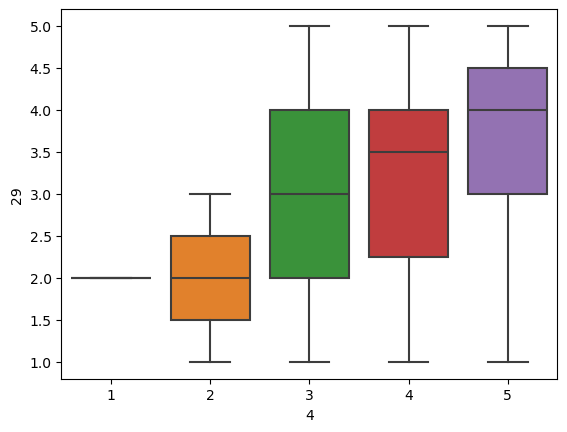

In [8]:
# Data visualisation
# Box plot of Scholarship type(4) vs cumulative grade point average in the last semester (30)
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="4", y="29", data=data)
plt.show()

In [ ]:
# Data preprocessing
# Check whether any missing values exist
data.isnull().sum()/data.shape[0]*100 

STUDENT ID    0.0
1             0.0
2             0.0
3             0.0
4             0.0
5             0.0
6             0.0
7             0.0
8             0.0
9             0.0
10            0.0
11            0.0
12            0.0
13            0.0
14            0.0
15            0.0
16            0.0
17            0.0
18            0.0
19            0.0
20            0.0
21            0.0
22            0.0
23            0.0
24            0.0
25            0.0
26            0.0
27            0.0
28            0.0
29            0.0
30            0.0
COURSE ID     0.0
GRADE         0.0
dtype: float64

In [ ]:
# Check whether any duplicate entries exist
data.duplicated().any() 

False

In [ ]:
# Check duplicate rows  
duplicate_rows = data[data.duplicated()] 
print("Number of duplicate rows : ", duplicate_rows.shape) 

# Remove duplicate row 
data = data.drop_duplicates() 
duplicate_rows = data[data.duplicated()] 
print("Number of duplicate rows : ", duplicate_rows.shape)

Number of duplicate rows :  (0, 33)
Number of duplicate rows :  (0, 33)


In [ ]:
# Delete unused columns
data.drop(['STUDENT ID','COURSE ID'], axis=1 ,inplace=True) 

Text(0.5, 1.0, 'Pearson Correlation')

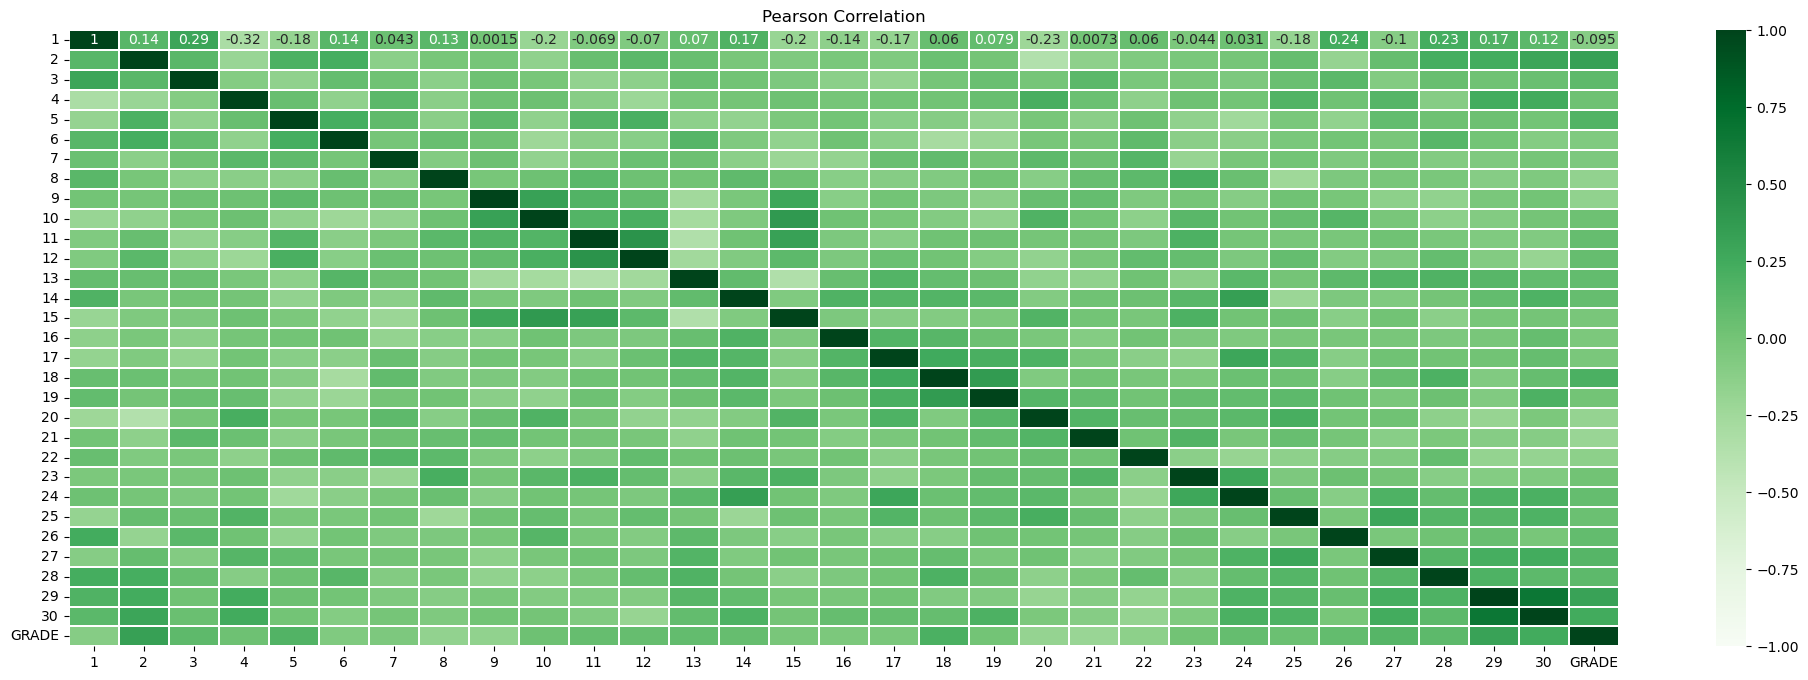

In [ ]:
# Find correlation between variables
pearsonCorr = data.corr(method = 'pearson')
spearmanCorr = data.corr(method = 'spearman')
fig = plt.subplots(figsize = (25,8))
sns.heatmap(pearsonCorr,vmin = -1,vmax = 1,cmap = "Greens",annot = True,linewidth = 0.1)
plt.title("Pearson Correlation")
#plt.savefig('Pearson Correlation')

Text(0.5, 1.0, 'Pearson Correlation')

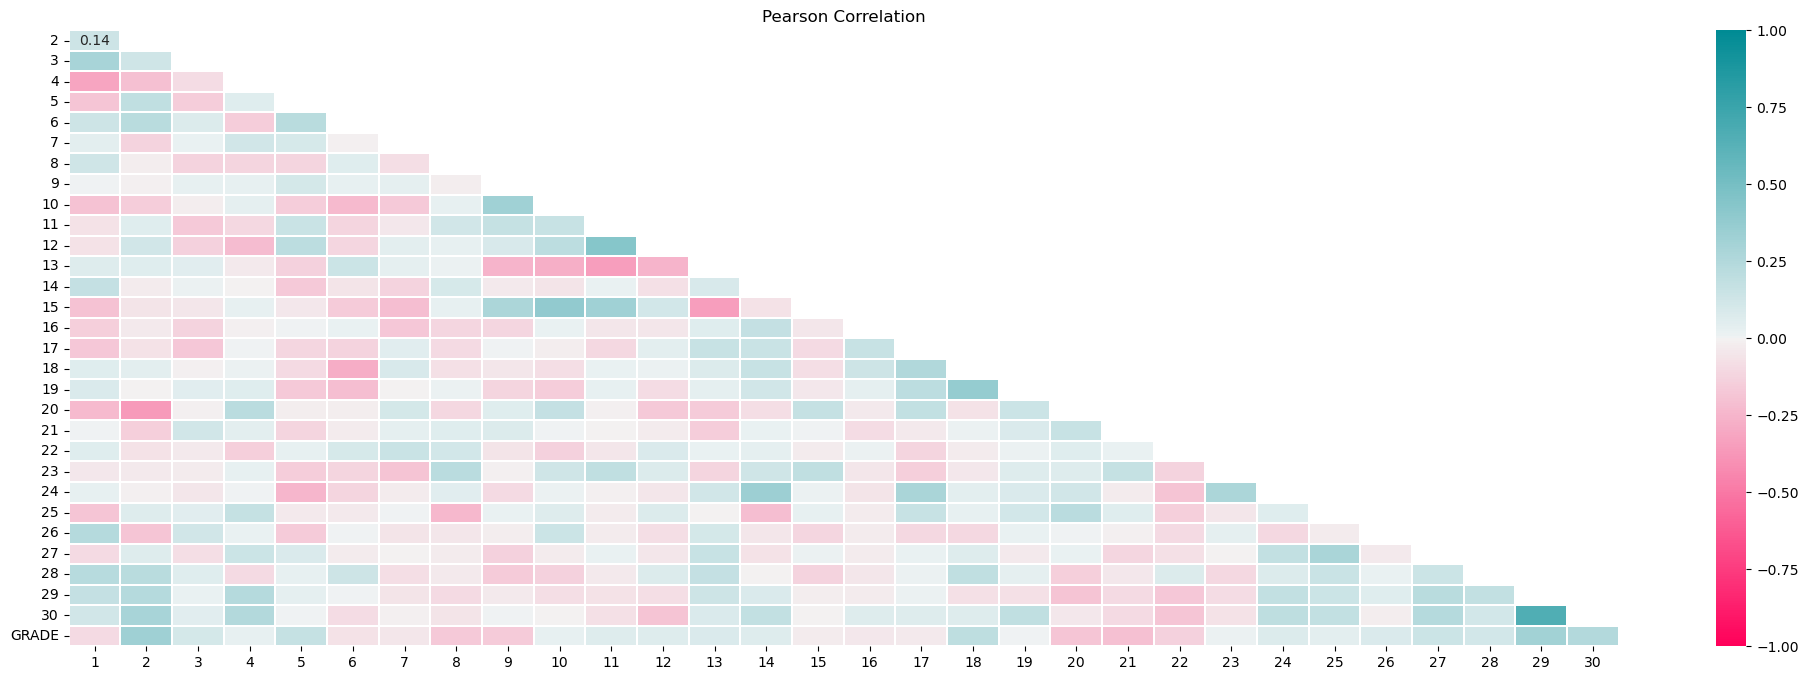

In [ ]:
# Build mask for both correlation matrices
# Pearson corr masking
# Generating mask for upper triangle
maskP = np.triu(np.ones_like(pearsonCorr,dtype = bool))

# Adjust mask and correlation
maskP = maskP[1:,:-1]
pCorr = pearsonCorr.iloc[1:,:-1].copy()

# Setting up a diverging palette
cmap = sns.diverging_palette(0,200,150,50,as_cmap=True)
fig = plt.subplots(figsize=(25,8))

sns.heatmap(pCorr, vmin = -1, vmax = 1, cmap = cmap, annot = True, linewidth = 0.3, mask = maskP)
plt.title("Pearson Correlation")
#plt.savefig('Pearson Correlation 2')

In [ ]:
data.dtypes # Check data types

1        int64
2        int64
3        int64
4        int64
5        int64
6        int64
7        int64
8        int64
9        int64
10       int64
11       int64
12       int64
13       int64
14       int64
15       int64
16       int64
17       int64
18       int64
19       int64
20       int64
21       int64
22       int64
23       int64
24       int64
25       int64
26       int64
27       int64
28       int64
29       int64
30       int64
GRADE    int64
dtype: object

In [ ]:
# Check for unique value in the column of student age
data['1'].unique() 

array([2, 1, 3], dtype=int64)

In [ ]:
# Check for numbers of unique value in the column of student age
data['1'].nunique()

3

In [ ]:
# Show the count of unique values in the column of student age
data['1'].value_counts()

1
2    70
1    65
3    10
Name: count, dtype: int64

In [ ]:
# Replace eight unique values of grade varaible to two classes
value_mapping = {0:'Fail',
                 1:'Pass',
                 2:'Pass',
                 3:'Pass',
                 4:'Pass',
                 5:'Pass',
                 6:'Pass',
                 7:'Pass',
                }

# Replace the specified values in the column
data['GRADE'] = data['GRADE'].replace(value_mapping)

# Assign 0 to Pass and 1 to Fail
data['GRADE'] = data['GRADE'].map({'Pass':0,'Fail':1}).astype(int)

In [ ]:
# Data splitting
# Separate the data into features(X) and target(y)
X = data.drop('GRADE', axis=1)
y = data['GRADE']

# Data is splitted into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Determine the shape of train and test sets
print("train and test sample size", X_train.shape,X_test.shape)

train and test sample size (116, 30) (29, 30)


## Model creation

## Supervised learning algorithms

In [ ]:
# HoldOut Method
# Logistic Regression 
from sklearn.linear_model import LogisticRegression

# Data splitting
X = data.drop('GRADE', axis=1)
y = data['GRADE']

# Data is splitted into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Train a logistic regression classifier 
logReg= LogisticRegression(random_state=0)
logReg.fit(X_train, y_train)

# Check classification report on testing set
y_pred_logReg= logReg.predict(X_test)
print("Classification report of test set\n", classification_report(y_test, y_pred_logReg, zero_division=1)) 
print("Confusian matrix:\n ", confusion_matrix(y_test, y_pred_logReg))

# Calculate kappa 
kappa = cohen_kappa_score(y_test, y_pred_logReg)
print("Kappa value:", kappa)

Classification report of test set
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       1.00      0.00      0.00         4

    accuracy                           0.86        29
   macro avg       0.93      0.50      0.46        29
weighted avg       0.88      0.86      0.80        29

Confusian matrix:
  [[25  0]
 [ 4  0]]
Kappa value: 0.0


In [ ]:
# K-fold cross validation method
# Logistic Regression
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

X = data.drop('GRADE', axis=1)
y = data['GRADE']
X = X.to_numpy()

# Initialize a list to store the performance metrics for the model
accuracy_scores = []
kappa_scores=[]
i = 0

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y):
    # Split the dataset into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train a logistic regression classifier 
    model = LogisticRegression(random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute performance metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    kappa_scores.append(cohen_kappa_score(y_test, y_pred))
   
# Compute average performance metrics
avg_accuracy = np.mean(accuracy_scores)
avg_kappa = np.mean(kappa_scores)

# Print average performance metrics
print("Average Accuracy:", avg_accuracy)
print("Average Kappa:", avg_kappa)

Average Accuracy: 0.9379310344827587
Average Kappa: 0.1204819277108434


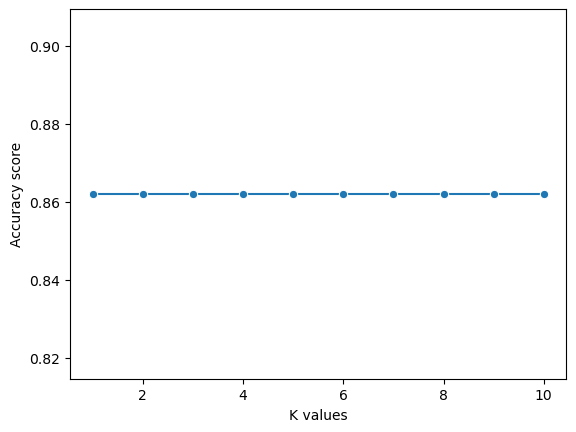

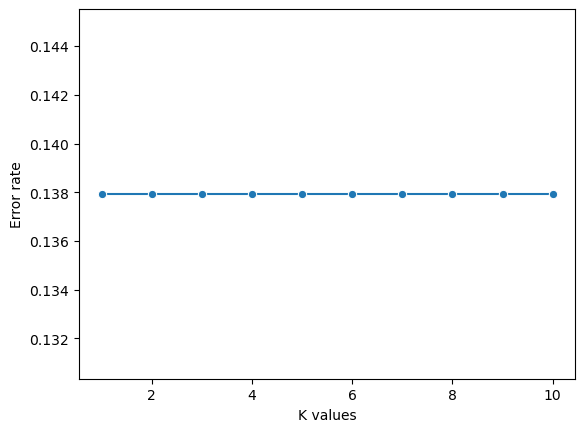

Best k =  1

kNN Evaluation: 

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       0.00      0.00      0.00         4

    accuracy                           0.86        29
   macro avg       0.43      0.50      0.46        29
weighted avg       0.74      0.86      0.80        29


kNN Confusion Matrix:

[[25  0]
 [ 4  0]]
----------------------------------------------------------------------------------------------------
Kappa value: 0.0


In [ ]:
# HoldOut Method
# k-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

# Data splitting
X = data.drop('GRADE', axis=1)
y = data['GRADE']

# Data is splitted into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Define values of k
k_values = list(range(1, 11))

# Lists to store scores and error rates
scores = []
error_rate = []

# Iterate through k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))
    error_rate.append(np.mean(y_pred != y_test))

# Plot accuracy scores
sns.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel("K values")
plt.ylabel("Accuracy score")
plt.show()

# Plot error rates
sns.lineplot(x=k_values, y=error_rate, marker='o')
plt.xlabel("K values")
plt.ylabel("Error rate")
plt.show()

# Find the best k
best_index = np.argmax(scores)
best_k = k_values[best_index]
print("Best k = ", best_k)

# Train the model with the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate the model
print("\nkNN Evaluation: \n")
print(classification_report(y_test, y_pred))
print("\nkNN Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))
print("-"*100)

# Calculate kappa 
kappa = cohen_kappa_score(y_test, y_pred)
print("Kappa value:", kappa)

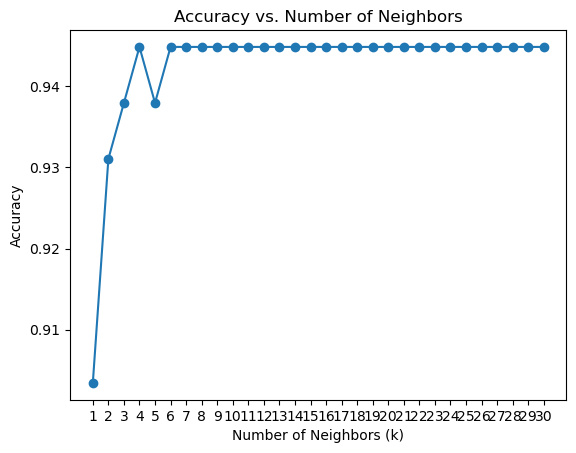

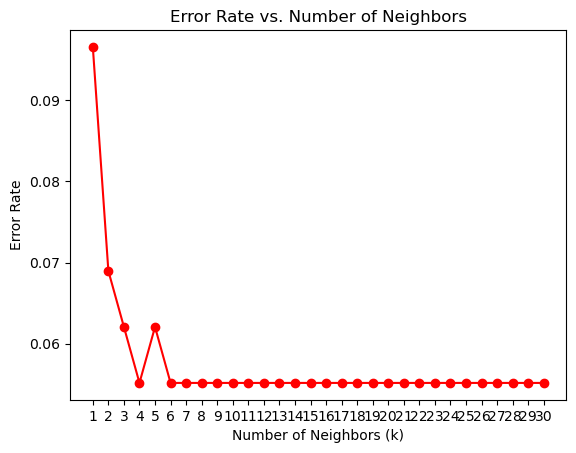

The best value of k is: 3

Classification report of test set:
 
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.33      0.50      0.40         2

    accuracy                           0.90        29
   macro avg       0.65      0.71      0.67        29
weighted avg       0.92      0.90      0.91        29

Kappa value for test set: 0.3458646616541353

Confusion Matrix:
[[25  2]
 [ 1  1]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score

neighbors = list(range(1, 31))
kappa_scores = []
accuracy_scores = []
error_rates = []

X = data.drop('GRADE', axis=1)
y = data['GRADE']
X = X.to_numpy()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Lists to store predicted and true labels for each fold
    y_true_list = []
    y_pred_list = []
    fold_accuracy = []
    fold_error_rate = []
    
    for train_index, test_index in skf.split(X, y):
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        
        knn.fit(X_train_fold, y_train_fold)
        y_pred_fold = knn.predict(X_test_fold)
        
        y_true_list.extend(y_test_fold)
        y_pred_list.extend(y_pred_fold)
        
        # Calculate accuracy for this fold
        accuracy = np.mean(y_pred_fold == y_test_fold)
        fold_accuracy.append(accuracy)
        
        # Calculate error rate for this fold
        error_rate = np.mean(y_pred_fold != y_test_fold)
        fold_error_rate.append(error_rate)
    
    # Calculate kappa score for this value of k
    kappa = cohen_kappa_score(y_true_list, y_pred_list)
    kappa_scores.append(kappa)
    
    # Calculate mean accuracy and error rate across all folds for this value of k
    mean_accuracy = np.mean(fold_accuracy)
    mean_error_rate = np.mean(fold_error_rate)
    accuracy_scores.append(mean_accuracy)
    error_rates.append(mean_error_rate)
    
# Plot accuracy against all k-folds
plt.plot(neighbors, accuracy_scores, marker='o', label='Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.xticks(neighbors)
plt.show()

# Plot error rate against all k-folds
plt.plot(neighbors, error_rates, marker='o', color='r', label='Error Rate')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Neighbors')
plt.xticks(neighbors)
plt.show()    

best_k = neighbors[kappa_scores.index(max(kappa_scores))]
print(f"The best value of k is: {best_k}")

# Train kNN using the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_test = knn.predict(X_test)

# Evaluate the model on the test set
print("\nClassification report of test set:\n ")
print(classification_report(y_test, y_pred_test))

# Calculate kappa value for the test predictions
kappa_test = cohen_kappa_score(y_test, y_pred_test)
print("Kappa value for test set:", kappa_test)

# plot graph
# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

In [ ]:
# Holdout Method
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Data splitting
X = data.drop('GRADE', axis=1)
y = data['GRADE']

# Data is splitted into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Train Naive Bayes classifier 
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
y_pred_model_NB = model_NB.predict(X_test)

# Evaluate the model
print("\nNaive Bayes Classification report\n", classification_report(y_test, y_pred_model_NB))
print("\nNaive Bayes Confusion matrix\n", confusion_matrix(y_test, y_pred_model_NB))

# Calculate kappa
kappa = cohen_kappa_score(y_test, y_pred_model_NB)
print("Kappa value:", kappa)


Naive Bayes Classification report
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       0.00      0.00      0.00         4

    accuracy                           0.86        29
   macro avg       0.43      0.50      0.46        29
weighted avg       0.74      0.86      0.80        29


Naive Bayes Confusion matrix
 [[25  0]
 [ 4  0]]
Kappa value: 0.0


In [ ]:
# K-fold cross validation method
# Naive Bayes
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB

X = data.drop('GRADE', axis=1)
y = data['GRADE']
X = X.to_numpy()

# Initialize a list to store the performance metrics for each model
accuracy_scores = []
kappa_scores=[]
i = 0

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y):
    # Split the dataset into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train Naive Bayes classifier 
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute performance metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    kappa_scores.append(cohen_kappa_score(y_test, y_pred))
   
# Compute average performance metrics
avg_accuracy = np.mean(accuracy_scores)
avg_kappa = np.mean(kappa_scores)

# Print average performance metrics
print("Average Accuracy:", avg_accuracy)
print("Average Kappa:", avg_kappa)

Average Accuracy: 0.7172413793103448
Average Kappa: 0.07870637352908953


In [ ]:
# Holdout Method
# Decision Trees (CART)
from sklearn.tree import DecisionTreeClassifier

# Data splitting
X = data.drop('GRADE', axis=1)
y = data['GRADE']

# Data is splitted into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Train Decision Trees classifier 
model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_DT.fit(X_train, y_train)
y_pred_model_DT = model_DT.predict(X_test)

# Evaluate the model
print("\nDecision Tree Classification report\n", classification_report(y_test, y_pred_model_DT, zero_division=1))
print("\nDecision Tree Confusion matrix\n", confusion_matrix(y_test, y_pred_model_DT))

# Calculate kappa
kappa = cohen_kappa_score(y_test, y_pred_model_DT)
print("Kappa value:", kappa)


Decision Tree Classification report
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       1.00      0.00      0.00         4

    accuracy                           0.86        29
   macro avg       0.93      0.50      0.46        29
weighted avg       0.88      0.86      0.80        29


Decision Tree Confusion matrix
 [[25  0]
 [ 4  0]]
Kappa value: 0.0


In [ ]:
# K-fold cross validation method
# Decision Trees (CART)
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

X = data.drop('GRADE', axis=1)
y = data['GRADE']
X = X.to_numpy()

# Initialize a list to store the performance metrics for each model
accuracy_scores = []
kappa_scores=[]
i = 0

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y):
    # Split the dataset into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train Decision Trees classifier 
    model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute performance metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    kappa_scores.append(cohen_kappa_score(y_test, y_pred))
   
# Compute average performance metrics
avg_accuracy = np.mean(accuracy_scores)
avg_kappa = np.mean(kappa_scores)

# Print average performance metrics
print("Average Accuracy:", avg_accuracy)
print("Average Kappa:", avg_kappa)

Average Accuracy: 0.9172413793103449
Average Kappa: 0.09852425575317145


In [ ]:
# Holdout Method
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Data splitting
X = data.drop('GRADE', axis=1)
y = data['GRADE']

# Data is splitted into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Train Random Forest classifier 
model_RF = RandomForestClassifier(n_estimators=500)
model_RF.fit(X_train, y_train)
y_pred_model_RF = model_RF.predict(X_test)

# Evaluate the model
print("\nRandom Forest Classification report\n", classification_report(y_test, y_pred_model_RF, zero_division=1))
print("\nRandom Forest Confusion matrix\n", confusion_matrix(y_test, y_pred_model_RF))

# Calculate kappa
kappa = cohen_kappa_score(y_test, y_pred_model_RF)
print("Kappa value:", kappa)


Random Forest Classification report
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       1.00      0.00      0.00         4

    accuracy                           0.86        29
   macro avg       0.93      0.50      0.46        29
weighted avg       0.88      0.86      0.80        29


Random Forest Confusion matrix
 [[25  0]
 [ 4  0]]
Kappa value: 0.0


In [ ]:
# Random Forest
# Hyperparameter tuning 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Data splitting
X = data.drop('GRADE', axis=1)
y = data['GRADE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', {0: 1, 1: 2}]  # Adjust weights based on class imbalance
}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Instantiate the grid search 
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')

# Perform the grid search on the training set
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train Random Forest classifier with the best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
print("\nRandom Forest Classification report\n", classification_report(y_test, y_pred))
print("\nRandom Forest Confusion matrix\n", confusion_matrix(y_test, y_pred))

# Calculate kappa
kappa = cohen_kappa_score(y_test, y_pred)
print("Kappa value:", kappa)


Best Parameters: {'bootstrap': False, 'class_weight': 'balanced', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.9742753623188406

Random Forest Classification report
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       0.00      0.00      0.00         4

    accuracy                           0.86        29
   macro avg       0.43      0.50      0.46        29
weighted avg       0.74      0.86      0.80        29


Random Forest Confusion matrix
 [[25  0]
 [ 4  0]]
Kappa value: 0.0


In [ ]:
# K-fold cross validation method
# Random Forest
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

X = data.drop('GRADE', axis=1)
y = data['GRADE']
X = X.to_numpy()

# Initialize a list to store the performance metrics for each model
accuracy_scores = []
kappa_scores=[]
i = 0

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y):
    # Split the dataset into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train a Random Forest classifier
    model = RandomForestClassifier(n_estimators=300)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute performance metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    kappa_scores.append(cohen_kappa_score(y_test, y_pred))
   
# Compute average performance metrics
avg_accuracy = np.mean(accuracy_scores)
avg_kappa = np.mean(kappa_scores)

# Print average performance metrics
print("Average Accuracy:", avg_accuracy)
print("Average Kappa:", avg_kappa)

Average Accuracy: 0.9448275862068967
Average Kappa: 0.0


In [ ]:
# Random Forest
# Resampling method using SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Data splitting
X = data.drop('GRADE', axis=1)
y = data['GRADE']

# Data is splitted into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(k_neighbors=3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train Random Forest classifier on resampled data
model_RF = RandomForestClassifier(n_estimators=100)
model_RF.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = model_RF.predict(X_test)

# Evaluate the model
print("\nRandom Forest Classification report\n", classification_report(y_test, y_pred))

# Calculate Cohen's Kappa score
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa score:", kappa)




Random Forest Classification report
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       0.00      0.00      0.00         4

    accuracy                           0.86        29
   macro avg       0.43      0.50      0.46        29
weighted avg       0.74      0.86      0.80        29

Cohen's Kappa score: 0.0


## Unsupervised learning algorithms

In [ ]:
# PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X= data

# Check min, mean, standard deviation, and maximum for each column
stats = pd.DataFrame({
    'min': X.min(),
    'mean': X.mean(),
    'stdev': X.std(),
    'max': X.max()
})
print(stats)

# Compute PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Print explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Extract eigenvalues and calculate variance explained
eigenvalues = pca.explained_variance_
variance_explained = eigenvalues / np.sum(eigenvalues) * 100


       min      mean     stdev  max
1        1  1.620690  0.613154    3
2        1  1.600000  0.491596    2
3        1  1.944828  0.537216    3
4        1  3.572414  0.805750    5
5        1  1.662069  0.474644    2
6        1  1.600000  0.491596    2
7        1  1.579310  0.495381    2
8        1  1.627586  1.020245    5
9        1  1.620690  1.061112    4
10       1  1.731034  0.783999    4
11       1  2.282759  1.223062    6
12       1  2.634483  1.147544    6
13       1  2.806897  1.360640    5
14       1  1.172414  0.490816    3
15       1  2.358621  0.805156    5
16       1  2.806897  1.329664    5
17       1  2.200000  0.917424    5
18       1  1.944828  0.562476    3
19       1  2.013793  0.539884    3
20       1  1.213793  0.411404    2
21       1  1.206897  0.588035    3
22       1  1.241379  0.429403    2
23       1  1.337931  0.614870    3
24       1  1.165517  0.408483    3
25       1  2.544828  0.564940    3
26       1  2.055172  0.674736    3
27       1  2.393103  0.6043

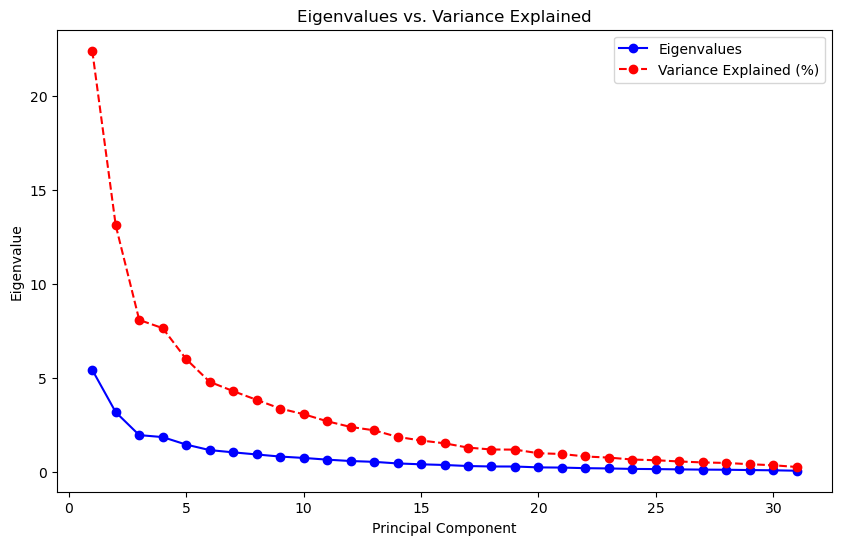

In [ ]:
# Plot eigenvalues against variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', color='blue', label='Eigenvalues')
plt.plot(range(1, len(eigenvalues) + 1), variance_explained, marker='o', color='red', linestyle='--', label='Variance Explained (%)')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues vs. Variance Explained')
plt.legend()
plt.show()


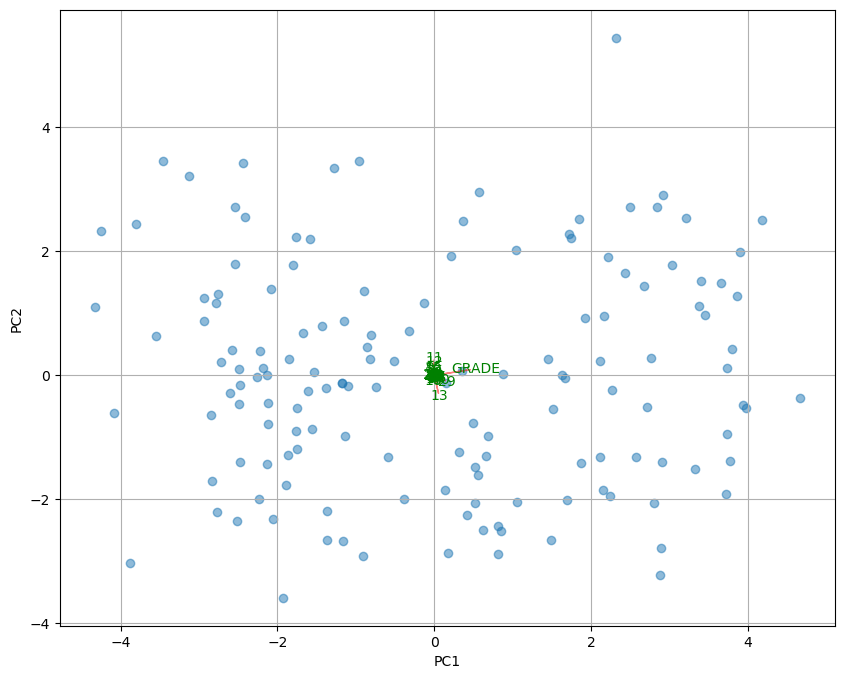

In [ ]:
# Plot biplot for the dataset
def biplot(pca_model, scale=0):
    plt.figure(figsize=(10, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
    for i in range(len(pca_model.components_)):
        plt.arrow(0, 0, pca_model.components_[0, i]*scale, pca_model.components_[1, i]*scale, color='r', alpha=0.5)
        plt.text(pca_model.components_[0, i]*scale * 1.15, pca_model.components_[1, i]*scale * 1.15, X.columns[i], color='g', ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

biplot(pca, scale=0.5)


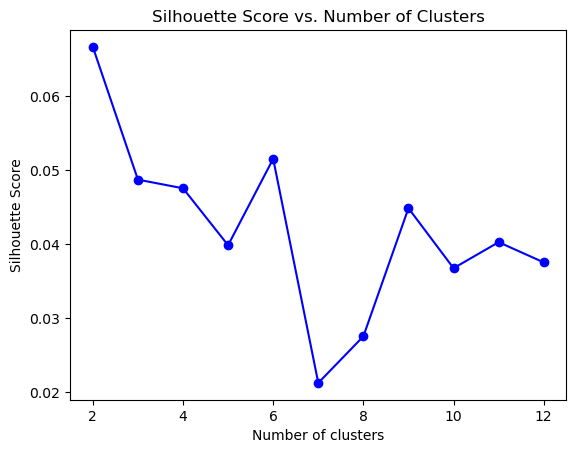

Silhouette Score for 2 Clusters: 0.06665911694373342
Silhouette Score for 3 Clusters: 0.04872391823031063
Silhouette Score for 4 Clusters: 0.04755487225841386
Silhouette Score for 5 Clusters: 0.03985811699745761
Silhouette Score for 6 Clusters: 0.05153805835021599
Silhouette Score for 7 Clusters: 0.021249321956980618
Silhouette Score for 8 Clusters: 0.027543687555624613
Silhouette Score for 9 Clusters: 0.04486381146474315
Silhouette Score for 10 Clusters: 0.03675286009279301
Silhouette Score for 11 Clusters: 0.04027133846656055
Silhouette Score for 12 Clusters: 0.037541882548114976

Optimal number of clusters: 2


In [ ]:
# K-modes clustering
from kmodes.kmodes import KModes
from sklearn import metrics

# Range of clusters to evaluate
k_range = range(2, 13)  # Starting from 2 clusters as silhouette score requires at least 2 clusters
silhouette_scores = []

# Determine silhouette score for each number of clusters
for k in k_range:
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0, random_state=42)
    clusters = km.fit_predict(X_train)
    silhouette_score = metrics.silhouette_score(X_train, clusters, metric='hamming')
    silhouette_scores.append(silhouette_score)

# Plotting the silhouette scores
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

# Print silhouette scores for each number of clusters
for k, score in zip(k_range, silhouette_scores):
    print(f"Silhouette Score for {k} Clusters:", score)
    
# Find the optimal number of clusters based on the highest silhouette score
optimal_k = np.argmax(silhouette_scores) + 2  # Adding 2 to match the cluster index with k_range start
print("\nOptimal number of clusters:", optimal_k)

In [ ]:
# Evaluate the model with optimal number of clusters
km_optimal = KModes(n_clusters=optimal_k, init='Huang', n_init=5, verbose=0, random_state=42)
clusters_optimal = km_optimal.fit_predict(X_test)

# Print the cluster centroids
print("\nCluster Centroids:", km_optimal.cluster_centroids_)


Cluster Centroids: [[2 2 2 3 2 2 2 1 1 1 1 2 5 1 2 3 2 2 2 1 1 1 1 1 3 3 2 1 3 3]
 [1 1 1 4 2 1 1 1 2 3 3 3 1 1 3 2 2 2 2 1 1 1 1 1 3 2 2 3 2 2]]


In [ ]:
# Evaluate the model
silhouette_score_optimal = metrics.silhouette_score(X_test, clusters_optimal, metric='hamming')
print("\nSilhouette Score for Optimal Clustering:", silhouette_score_optimal)


Silhouette Score for Optimal Clustering: 0.09977682672648863


In [ ]:
# Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

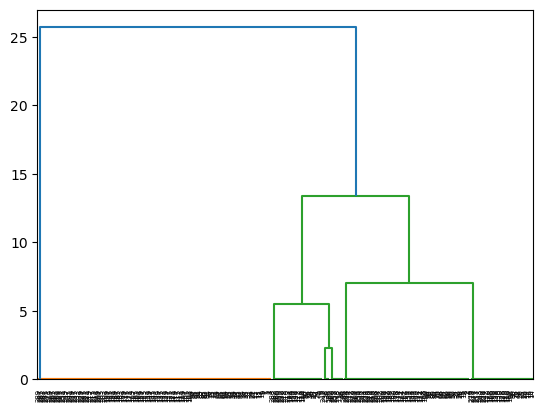

In [ ]:
X1 = data.loc[:,["17","GRADE"]].values
points=X1[0]
dendrogram=sch.dendrogram(sch.linkage(X1.reshape(-1, 1),method='ward'))

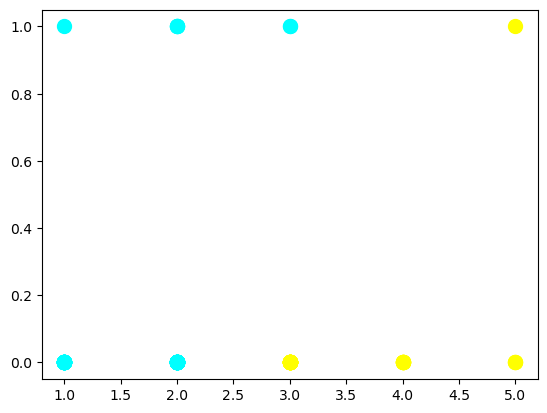

In [ ]:
#Perform actual clustering
hc=AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage="complete")
y_hc=hc.fit_predict(X1)
plt.scatter(X1[y_hc==0,0], X1[y_hc==0,1], s=100, c='cyan')
plt.scatter(X1[y_hc==1,0], X1[y_hc==1,1], s=100, c='yellow')
plt.scatter(X1[y_hc==2,0], X1[y_hc==2,1], s=100, c='red')
plt.scatter(X1[y_hc==3,0], X1[y_hc==3,1], s=100, c='green')
plt.title("Clustering")
plt.show()

In [ ]:
# Mean shift clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
X2 = data.loc[:,["4","29"]].values

# Bandwidth estimation
bandwidth = estimate_bandwidth(X2, quantile=0.2, n_samples=500)
print("Bandwitdth is ",bandwidth)

# Perform mean shift clustering
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X2)
labels=ms.labels_
cluster_centers=ms.cluster_centers_

#Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=100, label='Cluster Centers')
plt.title('Mean-Shift Clustering')
plt.xlabel('Scholarship Type')
plt.ylabel('CGPA last semester')
plt.legend()
plt.show()